Aminah Nurrahmawati

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from tensorflow import keras
from sklearn.metrics import mean_squared_error
import scipy.stats
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [82]:
# Color Setting

colors = ['#8EBAD9', '#FFF56D', '#66CD00']
tcolor_dict = {
    True : "#8EBAD9",
    False : "#FFF56D"
}
mycmp = LinearSegmentedColormap.from_list("MyCmp", ['#8EBAD9', '#FFFFFF', '#FFF56D'], N=100)

In [83]:
data_train=pd.read_csv('House_Rent_Dataset.csv')
data_train.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [84]:
data_train.corr()

,BHK,Rent,Size,Bathroom
BHK,1.000000,0.369718,0.716145,0.794885
Rent,0.369718,1.000000,0.413551,0.441215
Size,0.716145,0.413551,1.000000,0.740703
Bathroom,0.794885,0.441215,0.740703,1.000000


               BHK      Rent      Size  Bathroom
BHK       1.000000  0.568416  0.755146  0.790580
Rent      0.568416  1.000000  0.521420  0.662961
Size      0.755146  0.521420  1.000000  0.722133
Bathroom  0.790580  0.662961  0.722133  1.000000


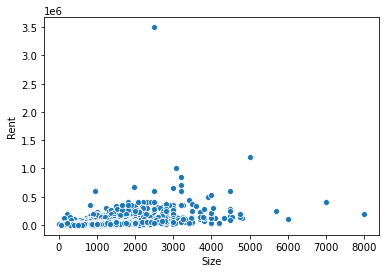

In [118]:
sns.scatterplot(x = 'Size', y = 'Rent', data = data_train) #plotting the relationship between Size and Rent
print(data_train.corr(method = 'spearman'))

In [92]:
data_train['Rent'].max() #THE MOST EXPENSIVE

3500000

In [93]:
data_train['Rent'].min()# the cheapest house

1200

In [87]:
data_train['Rent'].median()

16000.0

In [88]:
data_train['Rent'].mean()

34993.45132743363

In [90]:
data_train['Rent'].mode() #the most house rented by the consuments rent price is 15000

0    15000
dtype: int64

In [98]:
data_train['Size'].max()

8000

In [99]:
data_train['Size'].min()

10

In [101]:
data_train['Size'].mode() #the size of the house that most people tend to rent

0    1000
dtype: int64

In [123]:
data_train['Floor'].unique()

array(['Ground out of 2', '1 out of 3', '1 out of 2', 'Ground out of 1',
       'Ground out of 4', '1 out of 4', '1 out of 1', 'Ground out of 3',
       '2 out of 3', '4 out of 5', '2 out of 2', '2 out of 5',
       '4 out of 14', '3 out of 3', '5 out of 5', '4 out of 4',
       '7 out of 8', '2 out of 4', '3 out of 4', '1 out of 5',
       '8 out of 5', 'Ground out of 6', '2 out of 1',
       'Upper Basement out of 4', 'Ground out of 5', '3 out of 5',
       '11 out of 19', '5 out of 10', '11 out of 14',
       'Lower Basement out of 2', '2 out of 7', '4 out of 10',
       '7 out of 10', '2 out of 13', '6 out of 7', '4 out of 7',
       '14 out of 14', '43 out of 78', '2 out of 8', '13 out of 18',
       '5 out of 12', '18 out of 24', '3 out of 7', '17 out of 31',
       '11 out of 21', '7 out of 19', '14 out of 23', '9 out of 20',
       'Upper Basement out of 9', '19 out of 24', '3 out of 21',
       '1 out of 22', '8 out of 8', '6 out of 12', '4 out of 58',
       'Upper Basement o

In [55]:
#Import library
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
data_train['Size'] = sc_X.fit_transform(data_train['Size'].values.reshape(-1,1))
data_train['Rent'] = sc_X.fit_transform(data_train['Rent'].values.reshape(-1,1))

In [102]:
data_train.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [103]:
data_train.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [104]:
data_train['Area Type'].unique()

array(['Super Area', 'Carpet Area', 'Built Area'], dtype=object)

In [105]:
data_train['Area Type'].nunique()

3

In [106]:
data_train['Area Locality'].unique()

array(['Bandel', 'Phool Bagan, Kankurgachi', 'Salt Lake City Sector 2',
       ..., 'BN Reddy Nagar', 'Godavari Homes, Quthbullapur',
       'Manikonda, Hyderabad'], dtype=object)

In [107]:
data_train['Area Locality'].nunique()

2235

In [108]:
data_train['Furnishing Status'].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

In [109]:
data_train['Tenant Preferred'].unique()

array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object)

I will explore the quantity of tenant prefered ('Bachelors/Family', 'Bachelors', 'Family') for every Furnishing Status. This is important, because we can see the tendency of someone based on its tenant preferred to rent a house by seeing the Furnishing status

In [110]:
data_train[data_train['Furnishing Status'] == 'Unfurnished']['Tenant Preferred'].value_counts() 

Bachelors/Family    1261
Bachelors            409
Family               145
Name: Tenant Preferred, dtype: int64

In [111]:
data_train[data_train['Furnishing Status'] == 'Semi-Furnished']['Tenant Preferred'].value_counts() #explore the furnishing status with 

Bachelors/Family    1675
Bachelors            324
Family               252
Name: Tenant Preferred, dtype: int64

In [112]:
data_train[data_train['Furnishing Status'] == 'Furnished']['Tenant Preferred'].value_counts() #explore the furnishing status with 

Bachelors/Family    508
Bachelors            97
Family               75
Name: Tenant Preferred, dtype: int64

So, from the result above, we can conclude that the 'Bachelor/family' groups tend to chosee the Semi-Furnished one, the 'Bachelors' groups tend to choose the Unfurnished one, and 'family' tend to choose the Semi-Furnished one

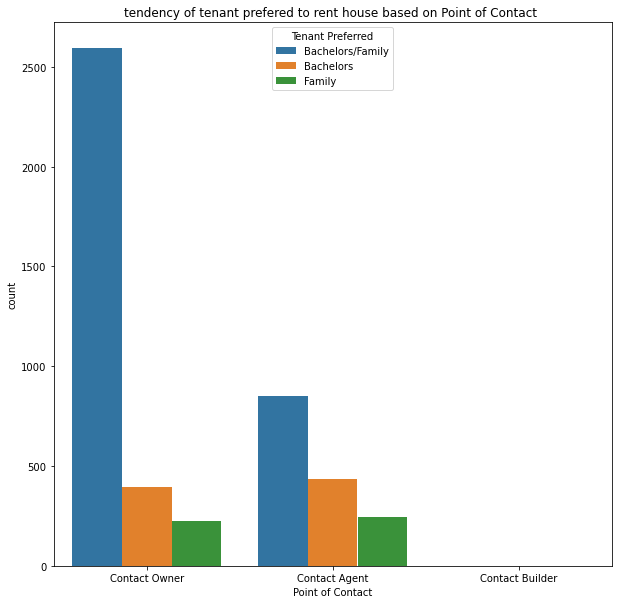

In [114]:
plt.figure(figsize=(10,10))
sns.countplot(data_train['Point of Contact'],hue=data_train['Tenant Preferred'])
plt.title("tendency of tenant prefered to rent house based on Point of Contact ");

So, from the plot we can see that the bachelors/family tend to choose to rent the house by contacting the owner directly, and the bachelors and family groups tend to rent the house via the agent

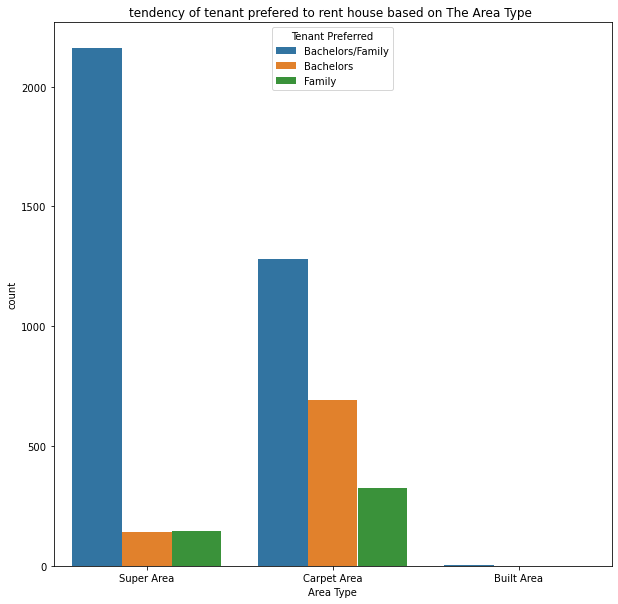

In [116]:
plt.figure(figsize=(10,10))
sns.countplot(data_train['Area Type'],hue=data_train['Tenant Preferred'])
plt.title("tendency of tenant prefered to rent house based on The Area Type ");

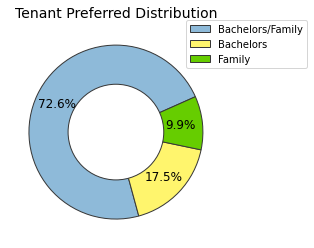

In [75]:
# Plot a pie chart to check if we have class imbalance problem

fig, ax = plt.subplots(figsize=(6,4))
ax.pie(x = data_train['Tenant Preferred'].value_counts(), autopct="%1.1f%%",
        pctdistance=.75, startangle=24, textprops={"fontsize":12},
        colors=colors, wedgeprops={'edgecolor':'#383838'});
# ax.text(1.5,.1,"There are approximately same amount of positive and negative class,\n so we don't have class imbalance problem.",
#         size=15)
ax.set_title("Tenant Preferred Distribution", fontdict={'fontsize':14})
ax.legend(['Bachelors/Family', 'Bachelors', 'Family'], bbox_to_anchor=(.8, .77))

centre_circle = plt.Circle((0,0),0.55,fc='white', ec='#383838')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

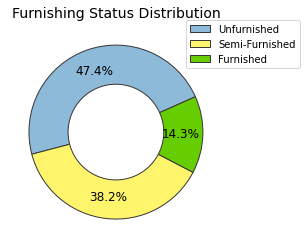

In [67]:
# Plot a pie chart to check if we have class imbalance problem

fig, ax = plt.subplots(figsize=(6,4))
ax.pie(x = data_train["Furnishing Status"].value_counts(), autopct="%1.1f%%",
        pctdistance=.75, startangle=24, textprops={"fontsize":12},
        colors=colors, wedgeprops={'edgecolor':'#383838'});
# ax.text(1.5,.1,"There are approximately same amount of positive and negative class,\n so we don't have class imbalance problem.",
#         size=15)
ax.set_title("Furnishing Status Distribution", fontdict={'fontsize':14})
ax.legend(['Unfurnished', 'Semi-Furnished', 'Furnished'], bbox_to_anchor=(.8, .77))

centre_circle = plt.Circle((0,0),0.55,fc='white', ec='#383838')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

(array([4.721e+03, 2.100e+01, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-0.4327047 ,  4.04729704,  8.52729879, 13.00730054, 17.48730228,
        21.96730403, 26.44730578, 30.92730752, 35.40730927, 39.88731101,
        44.36731276]),
 <a list of 10 Patch objects>)

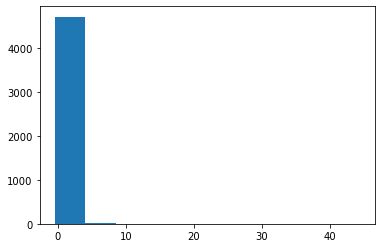

In [68]:
plt.hist(data_train['Rent'])
## we can assume it is not normally distributed

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

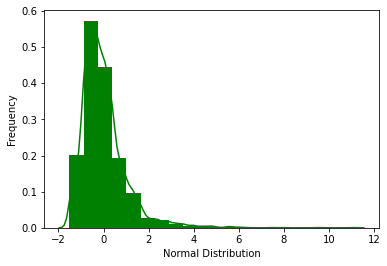

In [69]:
ax = sns.distplot(data_train['Size'],
                  bins=20,
                  kde=True,
                  color='green',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
## we can assume it is normal

In [70]:
scipy.stats.levene(data_train[data_train['Area Type'] == 'Super Area']['Size'],
                   data_train[data_train['Area Type'] == 'Carpet Area']['Size'], 
                   data_train[data_train['Area Type'] == 'Built Area']['Size'], center='mean')

# since the p-value is greater than 0.05 we can assume equality of variance

LeveneResult(statistic=18.503340353750698, pvalue=9.892107546100547e-09)

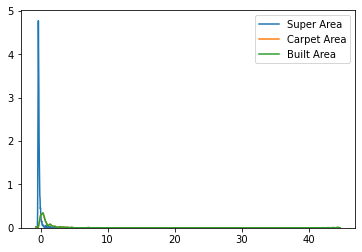

In [71]:
sns.kdeplot(data_train[data_train['Area Type'] == 'Super Area']['Rent'], Label = 'Super Area')
sns.kdeplot(data_train[data_train['Area Type'] == 'Carpet Area']['Rent'], Label = 'Carpet Area')
sns.kdeplot(data_train[data_train['Area Type'] == 'Carpet Area']['Rent'], Label = 'Built Area')

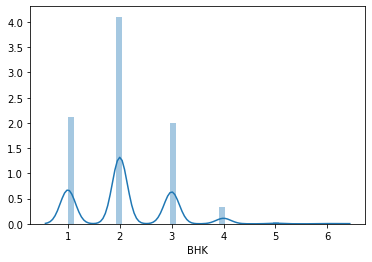

In [72]:
plt.figure()
sns.distplot(data_train['BHK'])
plt.show()

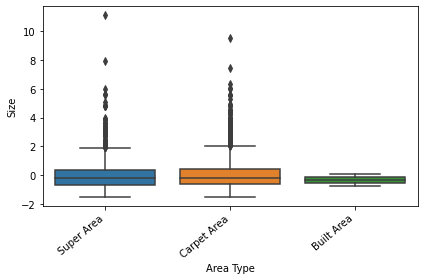

In [73]:
ax = sns.boxplot(x = 'Area Type', y = 'Size', data = data_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [121]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [124]:
data_train['Area Type']=label_encoder.fit_transform(data_train['Area Type'])
data_train['Area Locality']=label_encoder.fit_transform(data_train['Area Locality'])
data_train['City']=label_encoder.fit_transform(data_train['City'])
data_train['Furnishing Status']=label_encoder.fit_transform(data_train['Furnishing Status'])
data_train['Tenant Preferred']=label_encoder.fit_transform(data_train['Tenant Preferred'])
data_train['Bathroom']=label_encoder.fit_transform(data_train['Bathroom'])
data_train['Point of Contact']=label_encoder.fit_transform(data_train['Point of Contact'])

In [125]:
data_train.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,2,221,4,2,1,1,2
1,2022-05-13,2,20000,800,1 out of 3,2,1527,4,1,1,0,2
2,2022-05-16,2,17000,1000,1 out of 3,2,1760,4,1,1,0,2
3,2022-07-04,2,10000,800,1 out of 2,2,526,4,2,1,0,2
4,2022-05-09,2,7500,850,1 out of 2,1,1890,4,2,0,0,2


In [126]:
print(data_train.corr(method = 'spearman'))

                        BHK      Rent      Size  Area Type  Area Locality  \
BHK                1.000000  0.568416  0.755146  -0.150426       0.017214   
Rent               0.568416  1.000000  0.521420  -0.367497      -0.000851   
Size               0.755146  0.521420  1.000000  -0.050837      -0.013226   
Area Type         -0.150426 -0.367497 -0.050837   1.000000      -0.006951   
Area Locality      0.017214 -0.000851 -0.013226  -0.006951       1.000000   
City               0.036313  0.305843 -0.064802  -0.278370      -0.038678   
Furnishing Status -0.153007 -0.298702 -0.204138   0.053912       0.016224   
Tenant Preferred   0.036510  0.011798  0.044734   0.167723      -0.031161   
Bathroom           0.790580  0.662961  0.722133  -0.175964       0.015185   
Point of Contact  -0.219238 -0.596717 -0.152585   0.560258       0.000788   

                       City  Furnishing Status  Tenant Preferred  Bathroom  \
BHK                0.036313          -0.153007          0.036510  0.790580